 2. Carga y Exploración Inicial de Datos:

Descargar el dataset de la competencia.


Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.


Identificar y documentar valores faltantes y outliers.

In [ ]:
import pandas as pd
import numpy as np


url = 'https://drive.google.com/uc?id=1IiRj--6E2GLBVqTKN7TgxCalyYwILdRn&export=download'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


 3. Análisis Exploratorio de Datos (EDA):



Calcular estadísticas descriptivas básicas.


Crear visualizaciones para entender la distribución de las variables y sus relaciones.


Detectar y tratar valores faltantes y outliers.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Manejo de datos faltantes

In [ ]:
df['Age']= df['Age'].fillna(df['Age'].mean()) # Manejo de vlaores faltantes con la media de edad del DataFrame en la columna Age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Reemplazo de nulos en Cabin con la moda
# Calcular la moda de la columna
moda = df['Cabin'].mode()[0]
# Rellenar los valores nulos con la moda
df['Cabin'].fillna(moda, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Reemplazo de nulos en Embarked con la moda
# Calcular la moda de columna
moda1 = df['Embarked'].mode()[0]
# Rellenar los valores nulos con la moda
df['Embarked'].fillna(moda1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualización de los tipos de datos y verificación de presencia valores categóricos diferentes o ingresados de alguna forma diferente

In [ ]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna PassengerId:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

Visualización del comportamiento de datos

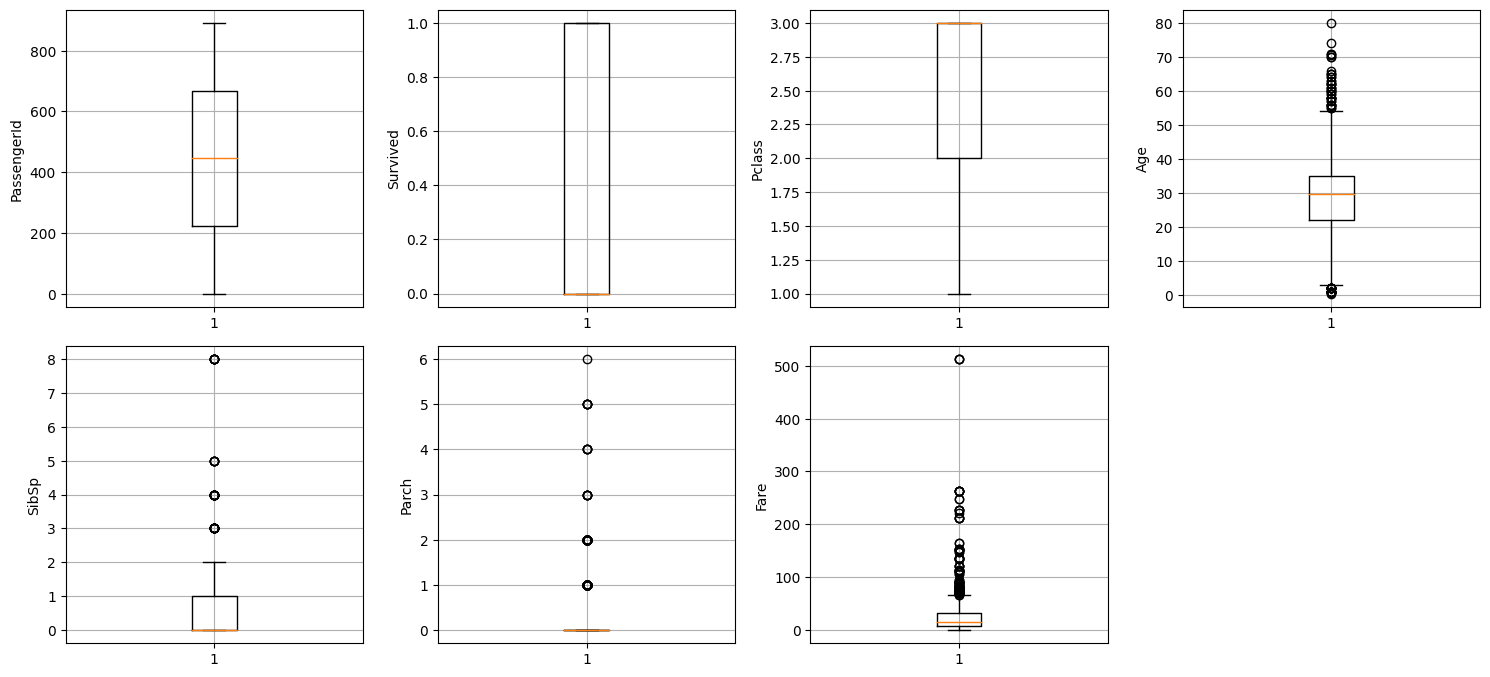

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

Visualización comportamiento de los datos

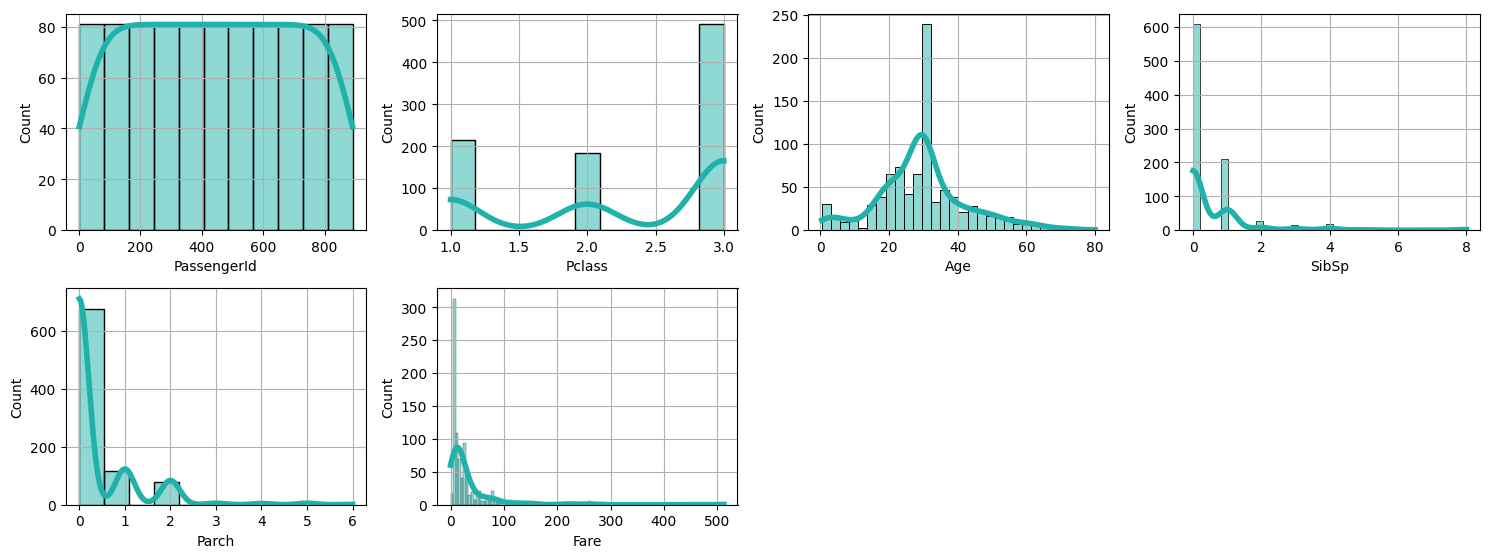

In [ ]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Survived')

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'lightseagreen', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

Se puede evidenciar el comportamiento de los datos es simétrico  en 'Parch'.


Comportamiento normal en la categoría 'Pclass' ya que se refiere a las clases dentro de la embarcación.

En 'Age' hay un comportamiento en forma de campana donde predomina el número 30.

Para 'SibSp' comportamiento bimodal.

'Fare' comportamiento sesgado hacia la izquierda lo que es coherente para el precio del tiquete.


In [ ]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


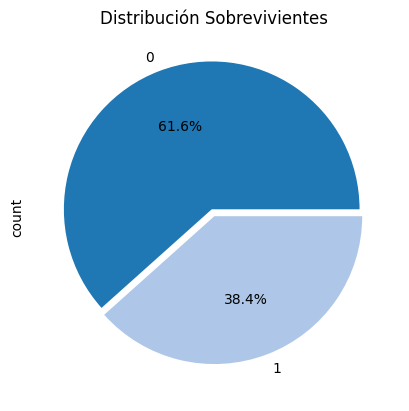

In [ ]:
colors = plt.get_cmap('tab20').colors
df.Survived.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0.05 , 0))
plt.title("Distribución Sobrevivientes")
plt.show()

Se evidencia un desbalanceo en la categoría 'Sobreviviente' y 'No Sobreviviente'.

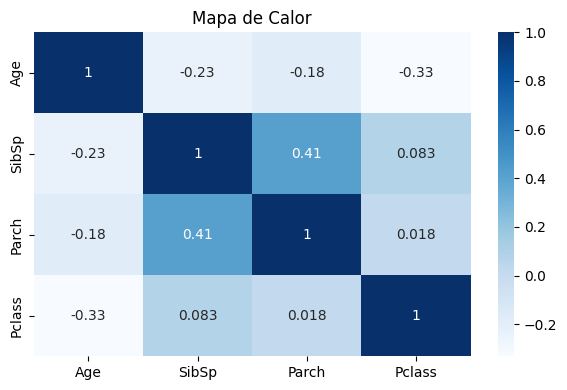

In [ ]:
correlacion = df[['Age', 'SibSp', 'Parch', 'Pclass']]
correlacion = correlacion.corr()
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(correlacion, annot=True, cmap='Blues')
plt.title('Mapa de Calor')
plt.tight_layout()
plt.show()

No se evidencia relación ni directa ni indirecta entre las categorías numéricas.

 4. Preprocesamiento de Datos:



Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).


Dividir el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay, auc

In [ ]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare'], axis=1)
y = df['Survived']

In [ ]:
#Definir las columnas numéricas y categóricas.

numeric_features = ['Age', 'SibSp', 'Parch', 'Pclass']

categorical_features = ['Sex', 'Cabin']

In [ ]:
# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')), # relleno de faltantes si es que los hay
    ('scaler', StandardScaler()) # Escalado de las categorías numéricas
])

In [ ]:
# Creación de un Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('nominal', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding de las categóricas
])

In [ ]:
# Usar ColumnTransformer para aplicar las transformaciones a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', numeric_transformer, numeric_features),
        ('categorica', categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('numerica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Pclass']),
                                ('categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Cabin'])])

In [ ]:
#Aplicar a X
X_t = preprocessor.fit_transform(X)

Balanceo de datos.

In [ ]:
from imblearn.over_sampling import SMOTE  # Balanceo con Smote

#Aplicación de Smote
smote = SMOTE(random_state=42)
X_r, y_r = smote.fit_resample(X_t,y)

In [ ]:
y_bl = pd.DataFrame(y_r, columns=['Survived'])

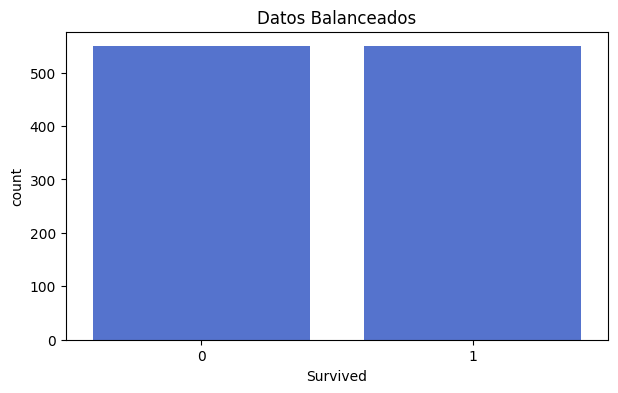


 Survived
0           549
1           549
Name: count, dtype: int64


In [ ]:
plt.figure(dpi=100, figsize=(7,4))
sns.countplot(data=y_bl, x='Survived',color='royalblue')
plt.title('Datos Balanceados')
plt.show()
print('\n',y_bl.value_counts())

In [ ]:
#Preparación de datos: Divide los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size = 0.3, random_state= 58)

# **Entrenamiento modelo árbol de decisión sin optimizar**

In [ ]:
# Entrenar el modelo Decision Tree Classifier
arbol = DecisionTreeClassifier(random_state=59)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=59)

In [ ]:
# Realizar predicciones
y_predA = arbol.predict(X_test)

In [ ]:
# Evaluar el modelo árbol de decisión
accuracyA = accuracy_score(y_test, y_predA)
print(f'Exactitud: {accuracyA}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predA))

# Matriz de Confusión
conf_matrixA = confusion_matrix(y_test, y_predA)
fpr, tpr, thresholds = roc_curve(y_test, y_predA)
roc_auc = auc(fpr, tpr)
print('Matriz de Confusión:')
print(conf_matrixA)

Exactitud: 0.8
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       162
           1       0.84      0.76      0.79       168

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

Matriz de Confusión:
[[137  25]
 [ 41 127]]


Gráficos de modelo Árbol de Decisión

Métricas modelo Árbol de Decisión Classifier

Informe de clasificación:
Exactitud: 0.8
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       162
           1       0.84      0.76      0.79       168

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



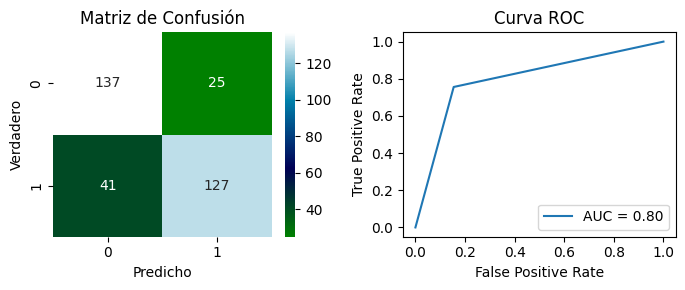

In [ ]:
# Visualizaciones modelo Árbol de Decisión Classifier'
print('Métricas modelo Árbol de Decisión Classifier')
print('\nInforme de clasificación:')
print(f'Exactitud: {accuracyA}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predA))

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrixA, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

**Optimización de parámetros con GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {
    'max_depth': [30, 50, 80],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 8, 12]
}

In [ ]:
# optimización con GridSearch del modelo Árbol Desicion Classifier
g_A = GridSearchCV(estimator=arbol, param_grid=parametros,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_A.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=59), n_jobs=-1,
             param_grid={'max_depth': [30, 50, 80],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [10, 15, 20]},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluación GridSearch modelo Árbol Desicion Classifier

m_A = g_A.best_estimator_
y_pred_A = m_A.predict(X_test)

# Métricas de evaluación con GridSearch modelo Árbol Desicion Classifier

r_A1 = classification_report(y_test, y_pred_A)
matriz_A1 = confusion_matrix(y_test, y_pred_A)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_A)
roc_auc = auc(fpr, tpr)

Gráficos de modelo Árbol de Desicion Classifier con GridSearchCV

Métricas modelo Árbol Desicion Classifier con GridSearchCV

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       162
           1       0.82      0.75      0.79       168

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



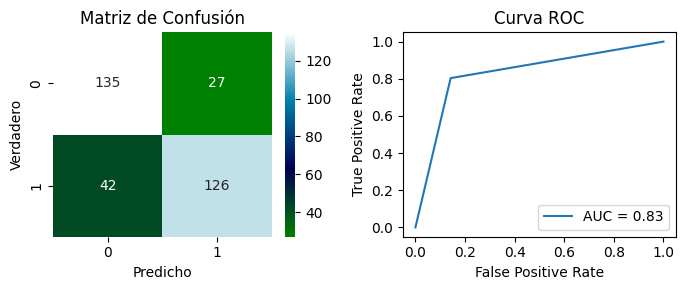

In [226]:
# Visualizaciones modelo Árbol Desicion Classifier con GridSearchCV
print('Métricas modelo Árbol Desicion Classifier con GridSearchCV')
print('\nInforme de clasificación:')
print(r_A1)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_A1, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Comparación de Árbol de Desición Classifier sin optimización y Optimizado.

En este caso el modelo árbol de desición sin optimizar presenta un rendimiento superior en general, mostrando mejores métricas en térmminos de exactitud, precisión recall y F1-score al ser comparado con el optimizado, esto es un indicativo de que la optimización no produjo mejoras importantes, esposible qu los parámetro ajustado no se alinearan con la distribución de los datos, es conveniente evaluar el rendimiento de los modelos tanto con ajustes como sin ellos ya que implementar ciertos parámetros no refleja en todas las veces mejoras del rendimiento.

# **Entrenamiento modelo KNeighbors Classifier sin optimizar**

In [ ]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para KNeighbors
modelo_KNN = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Se ajusta modelo de KNN
modelo_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Realizar predicciones
y_predKNN = modelo_KNN.predict(X_test)

In [ ]:
# Evaluar el modelo KNN Classifier
accuracyKNN = accuracy_score(y_test, y_predKNN)
print(f'Exactitud: {accuracyKNN}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predKNN))

# Matriz de Confusión
conf_matrixKNN = confusion_matrix(y_test, y_predKNN)
fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
roc_auc = auc(fpr, tpr)
print('Matriz de Confusión:')
print(conf_matrixKNN)

Exactitud: 0.803030303030303
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       162
           1       0.86      0.73      0.79       168

    accuracy                           0.80       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.80      0.80       330

Matriz de Confusión:
[[142  20]
 [ 45 123]]


Gráficas de modelo KNeighbors Classifier

Métricas modelo KNeighbors Classifier

Informe de clasificación:
Exactitud: 0.803030303030303
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       162
           1       0.86      0.73      0.79       168

    accuracy                           0.80       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.80      0.80       330



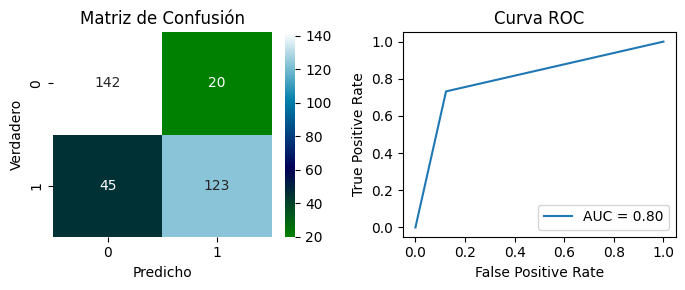

In [ ]:
# Visualizaciones modelo KNeighbors Classifier
print('Métricas modelo KNeighbors Classifier')
print('\nInforme de clasificación:')
print(f'Exactitud: {accuracyKNN}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predKNN))

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrixKNN, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

**Optimización de parámetros con GridSearchCV**

In [ ]:
parametrosKNN = {
    'n_neighbors': [2, 4, 6],
    'weights': ['uniform', 'ditance'],
    'leaf_size': [10, 20, 30]
}

In [ ]:
# optimización con GridSearch del modelo Árbol Desicion Classifier
g_KNN = GridSearchCV(estimator=modelo_KNN, param_grid=parametrosKNN,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': [2, 4, 6],
                         'weights': ['uniform', 'ditance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluación GridSearch modelo Árbol Desicion Classifier

m_KNN = g_KNN.best_estimator_
y_pred_KNN = m_KNN.predict(X_test)

# Métricas de evaluación con GridSearch modelo Árbol Desicion Classifier

r_KNN = classification_report(y_test, y_pred_KNN)
matriz_KNN = confusion_matrix(y_test, y_pred_KNN)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc = auc(fpr, tpr)

Gráficos modelo KNN con GridSearchCV

Métricas modelo KNeighbors Classifier con GridSearchCV

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       162
           1       0.83      0.78      0.80       168

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



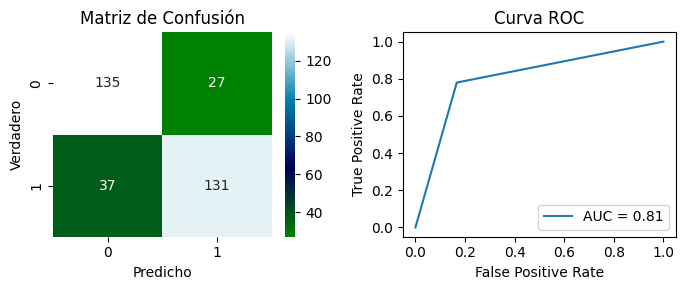

In [ ]:
# Visualizaciones modelo Árbol Desicion Classifier con GridSearchCV
print('Métricas modelo KNeighbors Classifier con GridSearchCV')
print('\nInforme de clasificación:')
print(r_KNN)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_KNN, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Comparación de KNeighbors Classifier sin optimización y Optimizado.

El modelo optimizado presenta mejoras generales en términos de exactitud y algunos aspecto métricos, pero no se puede dejar de lado que el modelo sin optimizar es competitivo en ciertas pareas como lo es el recall para la clase '0', la optimización evidencia un beneficio para la precisión y el recall de la clase '1', exponiendo un balance mejorado entre las clases. Es sobresaliente la conveniencia de la optimización en el ajuste del modelo, lo que puede resultar en un mejor rendimiento de forma equilibrada y efectiva en criterios de clasificación.

# **Entrenamiento modelo XGB Classifier sin optimizar**

In [ ]:
# modelo de XGb Classifier
XGB = XGBClassifier()

# Se ajusta modelo de XGb Classifier
XGB.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Realizar predicciones
y_predXGB = XGB.predict(X_test)


In [ ]:
# Evaluar el modelo XGB Classifier
accuracyXGB = accuracy_score(y_test, y_predXGB)
print(f'Exactitud: {accuracyXGB}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predXGB))

# Matriz de Confusión
conf_matrixXGB = confusion_matrix(y_test, y_predXGB)
fpr, tpr, thresholds = roc_curve(y_test, y_predXGB)
roc_auc = auc(fpr, tpr)
print('Matriz de Confusión:')
print(conf_matrixXGB)

Exactitud: 0.8242424242424242
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       162
           1       0.86      0.79      0.82       168

    accuracy                           0.82       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330

Matriz de Confusión:
[[140  22]
 [ 36 132]]


Gráfico de modelo XGB Classifier

Métricas modelo XGB Classifier

Informe de clasificación:
Exactitud: 0.8242424242424242
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       162
           1       0.86      0.79      0.82       168

    accuracy                           0.82       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330



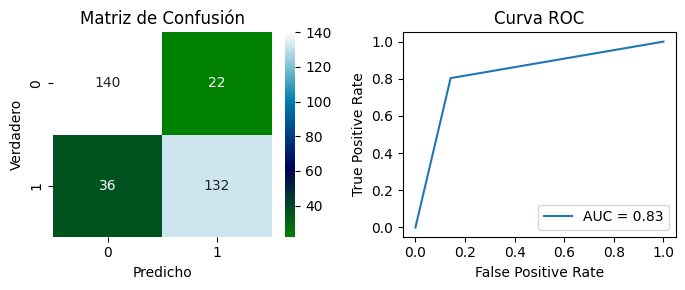

In [227]:
# Visualizaciones modelo XGB Classifier
print('Métricas modelo XGB Classifier')
print('\nInforme de clasificación:')
print(f'Exactitud: {accuracyXGB}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predXGB))

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrixXGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

**Optimización de parámetros con GridSearchCV**

In [ ]:
parametrosXGB = {
    'n_estimators': [30, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [8, 10, 15],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

In [ ]:
# optimización con GridSearch
g_XGB = GridSearchCV(estimator=XGB, param_grid=parametrosXGB,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [8, 10, 15], 'n_estimators': [30, 40, 50],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluación GridSearch modelo XGB Classifier

m_XGB = g_XGB.best_estimator_
y_pred_XGB = m_XGB.predict(X_test)

# Métricas de evaluación con GridSearch

r_XGB = classification_report(y_test, y_pred_XGB)
matriz_XGB = confusion_matrix(y_test, y_pred_XGB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)
roc_auc = auc(fpr, tpr)

Gráfico XGB Classifier con GridSearchCV

Métricas modelo XGB Classifier con GridSearchCV
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       162
           1       0.88      0.82      0.85       168

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



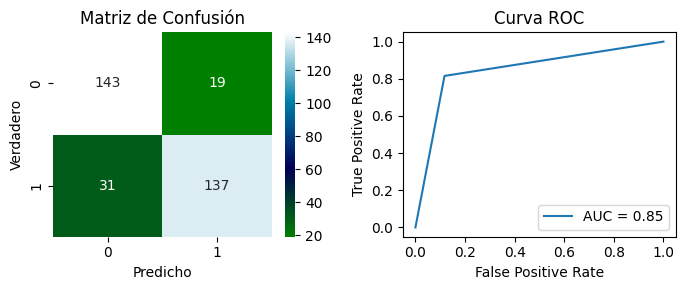

In [ ]:
# Visualizaciones modelo  XGB Classifier
print('Métricas modelo XGB Classifier con GridSearchCV')
print('Informe de clasificación:')
print(r_XGB)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_XGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Comparación del modelo XGB Classifier optimizado y sin optimizar.

El modelo optimizado muestra una mejora importante en los criterios de exactitud y otras mpetricas de rendimeinto, esto representa que la optimización ha sido efectiva, la capacidad del modelo en equilibrar la presición y el recall incrementa, respondiendo a un rendimiento mucho más sólido y fiable en ambas clases, este análisis resalta la importancia de realizar una optimización idónea para brindad un rendimiento mucho mejor y alcanzar resultados más precisos y equilibrados.

# **Entrenamiento modelo LGB Classifier sin optimizar**

In [ ]:
# Creación del modelo LightGBM

LGB = LGBMClassifier(random_state=42)

# Entrenamiento del modelo

LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 381, number of negative: 387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496094 -> initscore=-0.015625
[LightGBM] [Info] Start training from score -0.015625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [ ]:
y_predLGB = LGB.predict(X_test)
y_predLGB

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
exactitudLGB = accuracy_score(y_test, y_predLGB)

print(f'Exactitud: {exactitudLGB}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predLGB))

Exactitud: 0.8424242424242424
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       162
           1       0.86      0.82      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [ ]:
matrix_confusionLGB = confusion_matrix(y_test, y_predLGB)
fpr, tpr, thresholds = roc_curve(y_test, y_predLGB)
roc_auc = auc(fpr, tpr)

print('Matriz de Confusión:')
print(matrix_confusionLGB)

Matriz de Confusión:
[[140  22]
 [ 30 138]]


Métricas modelo LGB Classifier

Informe de clasificación:
Exactitud: 0.8424242424242424
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       162
           1       0.86      0.82      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



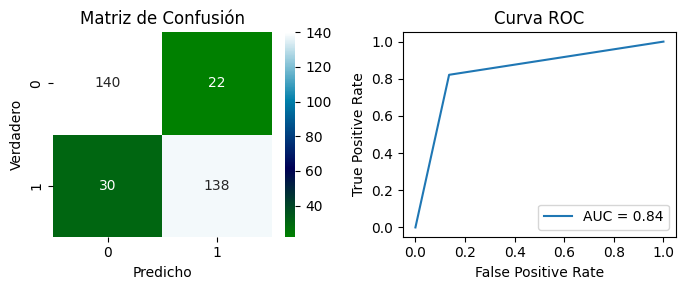

In [ ]:
# Visualizaciones modelo LGB Classifier
print('Métricas modelo LGB Classifier')
print('\nInforme de clasificación:')
print(f'Exactitud: {exactitudLGB}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predLGB))

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matrix_confusionLGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Optimización de parámetros con GridSearchCV

In [ ]:
parametrosLGB = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [20, 30, 45],
    'n_estimators': [80, 90, 120],
    'num_leaves': [5, 8, 10]
}

In [ ]:
# optimización con GridSearch del modelo LGB Classifier
g_LGB = GridSearchCV(estimator=LGB, param_grid=parametrosLGB,scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
g_LGB.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 381, number of negative: 387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496094 -> initscore=-0.015625
[LightGBM] [Info] Start training from score -0.015625


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [20, 30, 45],
                         'n_estimators': [80, 90, 120],
                         'num_leaves': [5, 8, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluación GridSearch modelo LGB Classifier

m_LGB = g_LGB.best_estimator_
y_pred_LGB = m_LGB.predict(X_test)

# Métricas de evaluación con GridSearch modelo LGB Classifier

r_LGB = classification_report(y_test, y_pred_LGB)
matriz_LGB = confusion_matrix(y_test, y_pred_LGB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LGB)
roc_auc = auc(fpr, tpr)

Métricas modelo LGB Classifier con GridSearchCV

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       162
           1       0.85      0.80      0.83       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



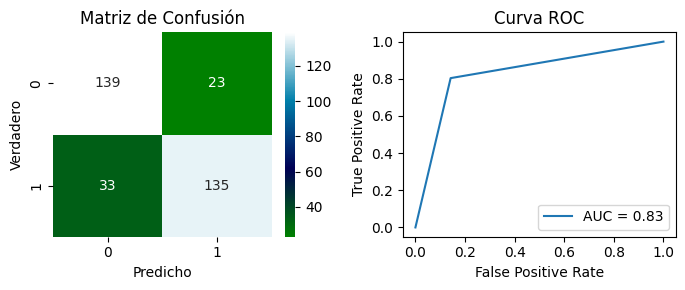

In [ ]:
# Visualizaciones modelo XGB Classifier con GridSearchCV
print('Métricas modelo LGB Classifier con GridSearchCV')
print('\nInforme de clasificación:')
print(r_LGB)

# Crear la figura y los subplots
plt.figure(figsize=(7, 3), dpi=100)

# Subplot 1: Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(matriz_LGB, annot=True, fmt='d', cmap='ocean')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

# Subplot 2: Curva ROC
plt.subplot(1, 2, 2)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(ax=plt.gca())  # Especificamos el eje actual
plt.title('Curva ROC')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Comparación del modelo LGB Classifier optimizado y sin optimizar.

En este caso particular la optimización no representa una mejora, al ser comparado con el modelo sin optimizar ya que ha dmeostrado ser más eficaz en lo que se refiere a exactitud y otors indicadores de rendimiento. Esto resalta la importandia de evaluar los rsultados de la optimización y considerar que no es una garantía para obtener mejores rendimientos.

De los modelos empleados anteriormente el XGB Classifier con GridSearch es el mejor modelo para el caso presentado, puesto que da resultado con mayor exactitud y el equilibrio en las métricas de precisión y recall. Este modelo es el más idóneo para realizar predicciones en este conjunto de datos.